<h1>Istrazivacka analiza podataka</h1>

In [9]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import loadtxt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras as keras

from keras.models import load_model
from keras.optimizers import Adadelta
from keras.layers import Dropout
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, Nadam
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import sklearn.metrics as sk
from sklearn.metrics import f1_score

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from collections import Counter
from IPython.display import display, HTML

In [10]:
df = pd.read_csv("datasets/bank-additional-full.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
df.shape

(41188, 21)

In [13]:
print('Jobs:\n', df['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [14]:
print('Marital:\n', df['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [15]:
print('Education:\n', df['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [16]:
print('Default:\n', df['default'].unique())
print('Housing:\n', df['housing'].unique())
print('Loan:\n', df['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


In [17]:
df = df[~df.apply(lambda row: (row == 'unknown').any(), axis=1)]

In [18]:
df.shape

(30488, 21)

<h2>Detekcija outlier-a</h2>

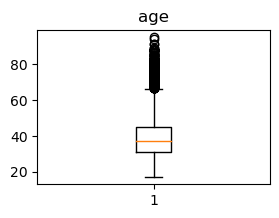

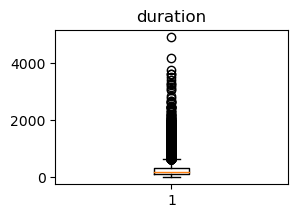

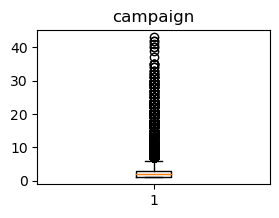

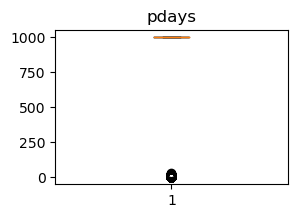

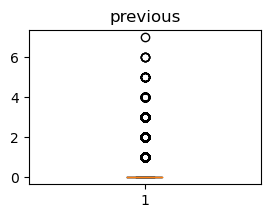

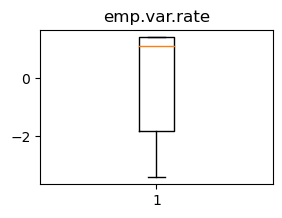

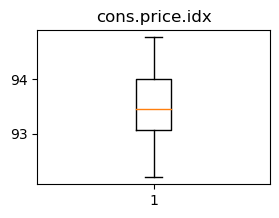

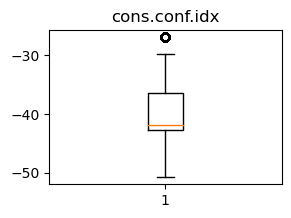

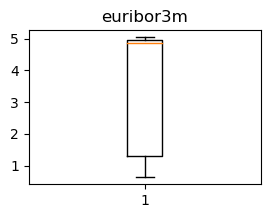

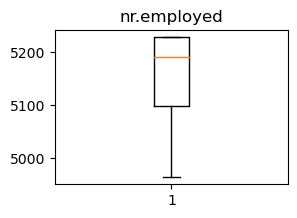

In [19]:
columns_numeric = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed' ]
for i, column in enumerate(columns_numeric):
        plt.figure(figsize=(3, 2), dpi=100)
        plt.boxplot(df[column])
        plt.title(column)
        plt.show()

<h2>Izbacivanje outlier-a</h2>

In [20]:
columns_with_outliers = ['age', 'duration', 'campaign']
Q1 = df[columns_with_outliers].quantile(0.25)
Q3 = df[columns_with_outliers].quantile(0.75)
IQR = Q3-Q1

In [21]:
IQR

age          14.0
duration    218.0
campaign      2.0
dtype: float64

In [22]:
df_without_outliers = df
for i, column in enumerate(columns_with_outliers):
    df_without_outliers = df_without_outliers[(df_without_outliers[column] >= Q1[i] - 1.5 * IQR[i]) & (df_without_outliers[column] <= Q3[i] + 1.5 * IQR[i])]

In [23]:
df_without_outliers.shape

(26329, 21)

In [24]:
df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26329 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             26329 non-null  int64  
 1   job             26329 non-null  object 
 2   marital         26329 non-null  object 
 3   education       26329 non-null  object 
 4   default         26329 non-null  object 
 5   housing         26329 non-null  object 
 6   loan            26329 non-null  object 
 7   contact         26329 non-null  object 
 8   month           26329 non-null  object 
 9   day_of_week     26329 non-null  object 
 10  duration        26329 non-null  int64  
 11  campaign        26329 non-null  int64  
 12  pdays           26329 non-null  int64  
 13  previous        26329 non-null  int64  
 14  poutcome        26329 non-null  object 
 15  emp.var.rate    26329 non-null  float64
 16  cons.price.idx  26329 non-null  float64
 17  cons.conf.idx   26329 non-null 

In [25]:
mapiranje = {'yes': 1, 'no': 0}
df_without_outliers['y'] = df_without_outliers['y'].map(mapiranje)

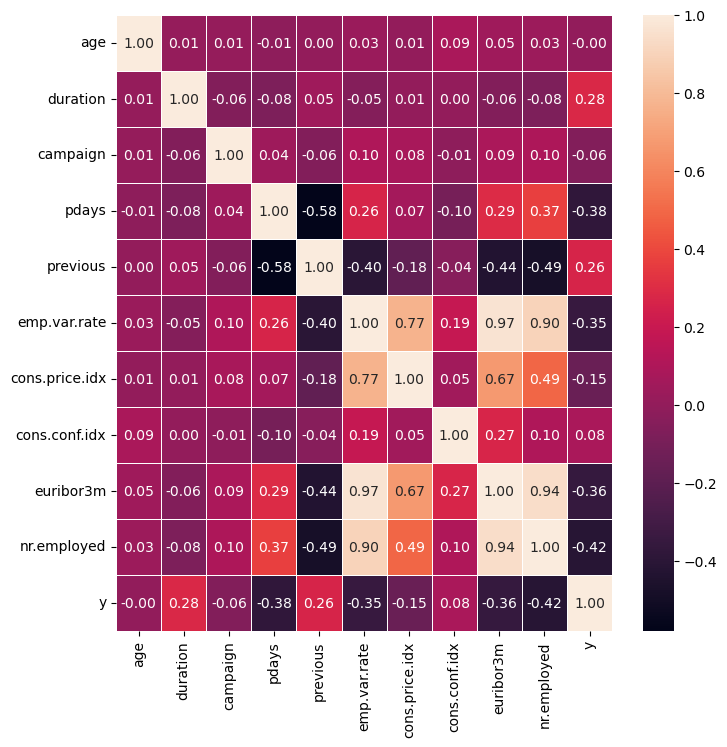

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(df_without_outliers.corr(),annot=True,linewidths=0.7,fmt=".2f")
plt.show()

In [27]:
columns_to_drop = ['emp.var.rate', 'euribor3m']
df_dropped = df_without_outliers.drop(columns_to_drop, axis = 1)

<h2>One hot encoding</h2> 

In [28]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
encoded_columns = pd.get_dummies(df_dropped[categorical_columns], prefix=categorical_columns)
df_encoded = pd.concat([df_dropped, encoded_columns], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

<h2>Podela dataset-a</h2>

In [38]:
df_train, df_test = train_test_split(df_encoded, test_size = 0.3)
df_train, df_val = train_test_split(df_train, test_size = 0.3)

In [39]:
x_train = df_train.drop('y', axis=1)
y_train = df_train['y']
x_val = df_val.drop('y', axis=1)
y_val = df_val['y']
x_test = df_test.drop('y', axis=1)
y_test = df_test['y']

<h2>Skaliranje</h2>

In [41]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.fit_transform(x_val)
x_test_scaled = sc.transform(x_test)

<h2>Funkcije za evaluaciju</h2>

In [32]:
def confusionmat(y,y_hat):
  from sklearn.metrics import confusion_matrix,accuracy_score
  cm = confusion_matrix(y, y_hat)
  accu=accuracy_score(y,y_hat)
  print(cm,"\n")
  print("The accuracy is",accu)

In [33]:
def learningcurve(history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [34]:
def bar_plot(models):
    colors = []
    x = []
    for i in range(len(models)):
        colors.append(plt.cm.Set2(i))
        x.append(models[i][1])
      
    plt.bar(range(len(x)), x, color=colors)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Bar plot of f-measure for every model')
    for i, val in enumerate(x):
        plt.text(i, val + 0.02, f"{val:.3f}", ha='center')   
    plt.ylim(0, max(x) + 0.1)
    tick_labels = ['Model {}'.format(i+1) for i in range(len(x))]
    plt.xticks(range(len(x)), tick_labels)
    plt.show()

In [35]:
def neural_network(nodes, activation_functions, optimizer, callbacks, x_train, y_train, epochs):
    model = Sequential()
    for node, func in zip(nodes, activation_functions):
        model.add(Dense(node,activation=func))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    history=model.fit(x_train, 
                      y_train, 
                      batch_size = 10, 
                      epochs=epochs,
                      validation_data=(x_val_scaled, y_val), 
                      verbose=0, 
                      callbacks=callbacks)
    
    y_pred_prob = model.predict(x_test_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int)  
    pre_score = sk.average_precision_score(y_test, y_pred)
    test_results = model.evaluate(x_test_scaled, y_test)
    print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
    print("The model test average precision score is {}.".format(pre_score))
    f1 = f1_score(y_test, y_pred)
    print("F1 score:", f1)
    confusionmat(y_test,y_pred)
    learningcurve(history)
    results = []
    results.append(model)
    results.append(f1)
    results.append(test_results[1])
    return results

<h2>1 Podesavanje optimizer-a</h2>

Optimizer:  sgd
247/247 [==============================] - 1s 3ms/step
Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_267 (Dense)           (None, 16)                896       
                                                                 
 dense_268 (Dense)           (None, 1)                 17        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 5ms/step - loss: 0.1824 - accuracy: 0.9201
For epoch = 100, the model test accuracy is 0.9201164841651917.
The model test average precision score is 0.3346817963091807.
[[6911  241]
 [ 390  357]] 

The accuracy is 0.9201164704392961
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


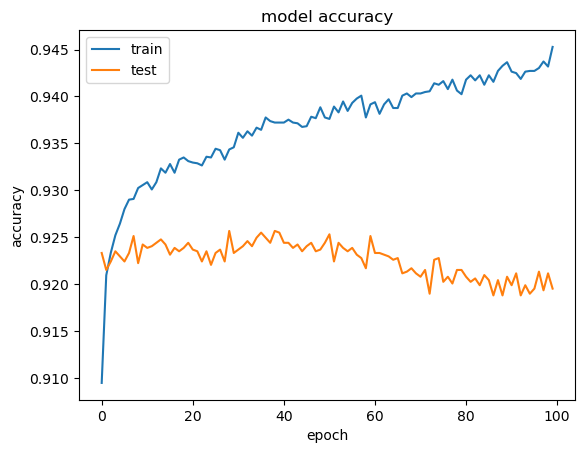

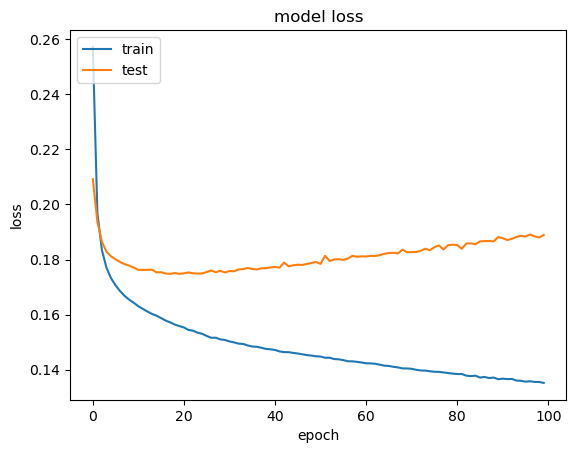

Optimizer:  rmsprop
247/247 [==============================] - 1s 3ms/step
Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_269 (Dense)           (None, 16)                896       
                                                                 
 dense_270 (Dense)           (None, 1)                 17        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 5ms/step - loss: 0.2406 - accuracy: 0.9147
For epoch = 100, the model test accuracy is 0.9146727323532104.
The model test average precision score is 0.31767922563499446.
[[6864  288]
 [ 386  361]] 

The accuracy is 0.9146727433852386
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


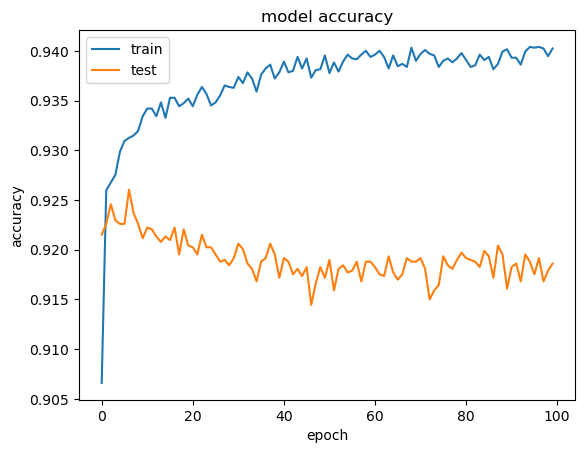

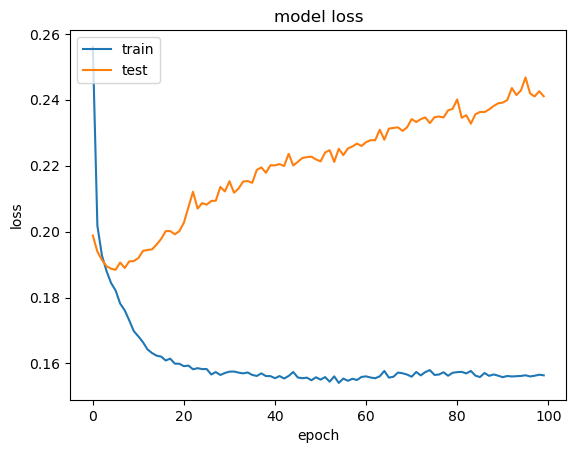

Optimizer:  adam
247/247 [==============================] - 1s 3ms/step
Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_271 (Dense)           (None, 16)                896       
                                                                 
 dense_272 (Dense)           (None, 1)                 17        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.2085 - accuracy: 0.9189
For epoch = 100, the model test accuracy is 0.9188504815101624.
The model test average precision score is 0.33574344803339784.
[[6890  262]
 [ 379  368]] 

The accuracy is 0.9188504874034688
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


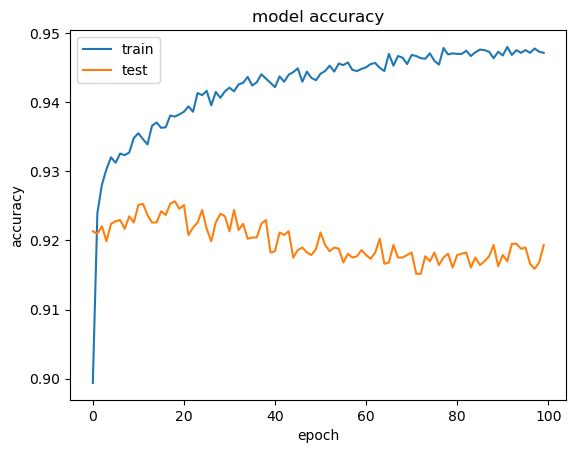

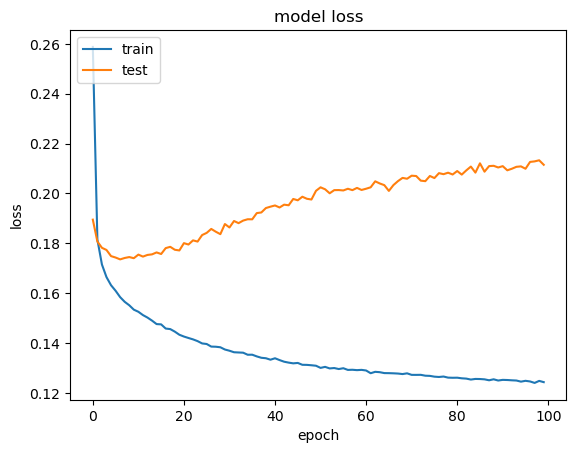

Optimizer:  adagrad
247/247 [==============================] - 1s 4ms/step
Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_273 (Dense)           (None, 16)                896       
                                                                 
 dense_274 (Dense)           (None, 1)                 17        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.1985 - accuracy: 0.9166
For epoch = 100, the model test accuracy is 0.9165717363357544.
The model test average precision score is 0.2558185265336229.
[[7010  142]
 [ 517  230]] 

The accuracy is 0.9165717179389796
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


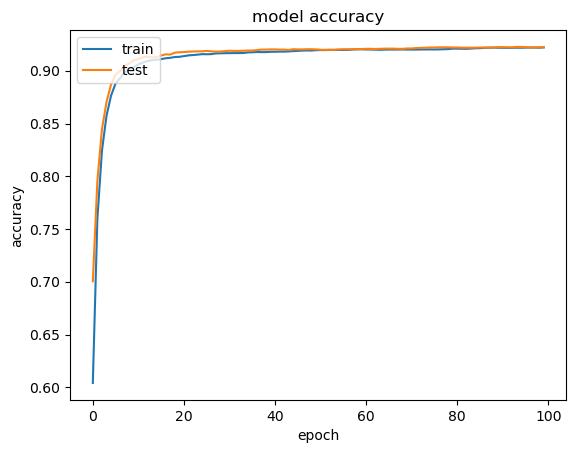

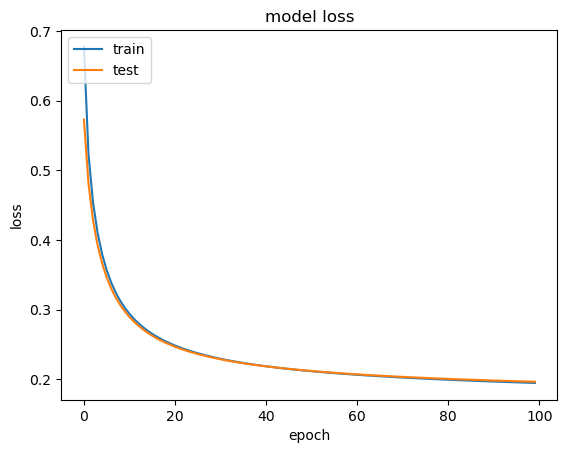

Optimizer:  adadelta
247/247 [==============================] - 1s 3ms/step
Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_275 (Dense)           (None, 16)                896       
                                                                 
 dense_276 (Dense)           (None, 1)                 17        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.3741 - accuracy: 0.8834
For epoch = 100, the model test accuracy is 0.883402943611145.
The model test average precision score is 0.19255087192674994.
[[6717  435]
 [ 486  261]] 

The accuracy is 0.8834029624003038
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


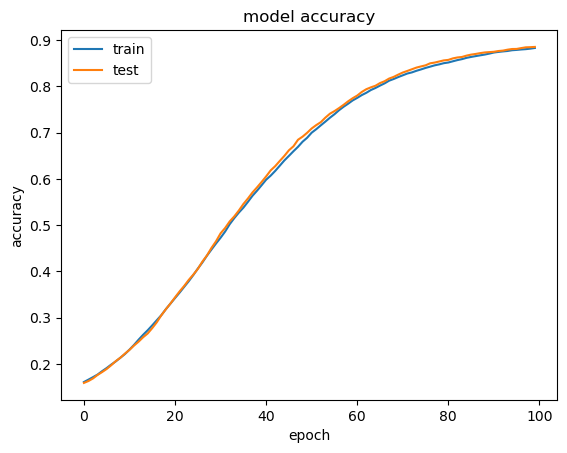

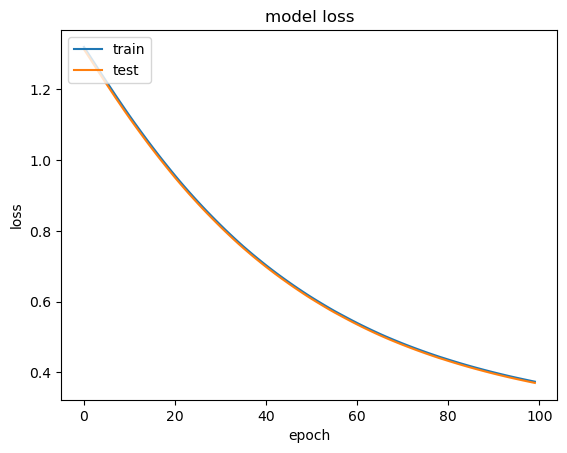

Optimizer:  nadam
247/247 [==============================] - 1s 4ms/step
Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_277 (Dense)           (None, 16)                896       
                                                                 
 dense_278 (Dense)           (None, 1)                 17        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 2s 6ms/step - loss: 0.2068 - accuracy: 0.9199
For epoch = 100, the model test accuracy is 0.9198632836341858.
The model test average precision score is 0.34100600482311916.
[[6895  257]
 [ 376  371]] 

The accuracy is 0.9198632738321306
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


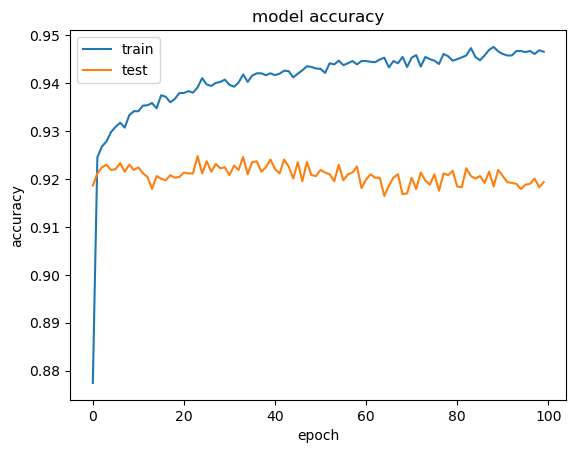

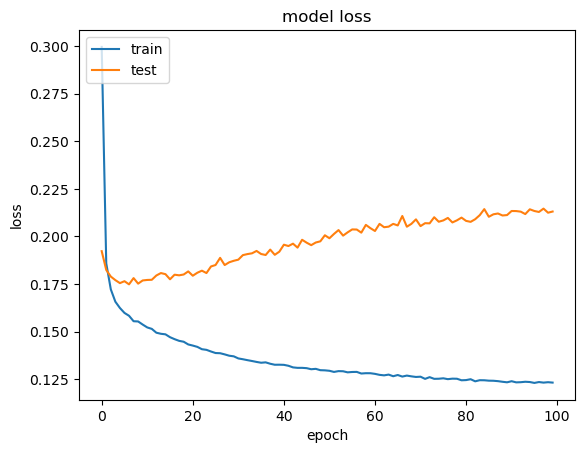

In [201]:
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, Nadam

optimizers = ['sgd', 'rmsprop', 'adam', 'adagrad', 'adadelta', 'nadam']

for optimizer in optimizers:
    model = Sequential()
    model.add(Dense(16,activation="relu"))
    model.add(Dense(1,activation="sigmoid"))
    
    print("Optimizer: ", optimizer)
    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history=model.fit(x_train_scaled, y_train, batch_size = 10, epochs=100,validation_split=0.3, verbose=0)
    y_pred_prob = model.predict(x_test_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int)  
    pre_score = sk.average_precision_score(y_test, y_pred)
    model.summary()
    test_results = model.evaluate(x_test_scaled, y_test)
    print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
    print("The model test average precision score is {}.".format(pre_score))
    confusionmat(y_test,y_pred)
    learningcurve(history)

Zaključak: najbolje je koristiti adadelta optimizer

<h2>2 Neskaliran vs skaliran</h2>

247/247 [==============================] - 1s 4ms/step
Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_220 (Dense)           (None, 16)                896       
                                                                 
 dense_221 (Dense)           (None, 1)                 17        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 1.3271 - accuracy: 0.9014
For epoch = 75, the model test accuracy is 0.9013799428939819.
The model test average precision score is 0.3459567043586106.
[[6847  305]
 [ 474  273]] 

The accuracy is 0.9013799215090518
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


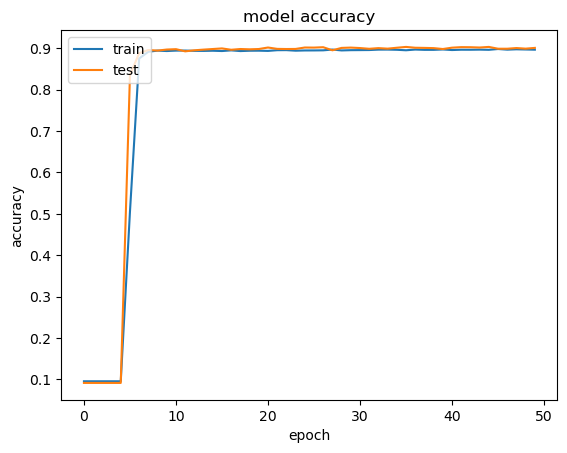

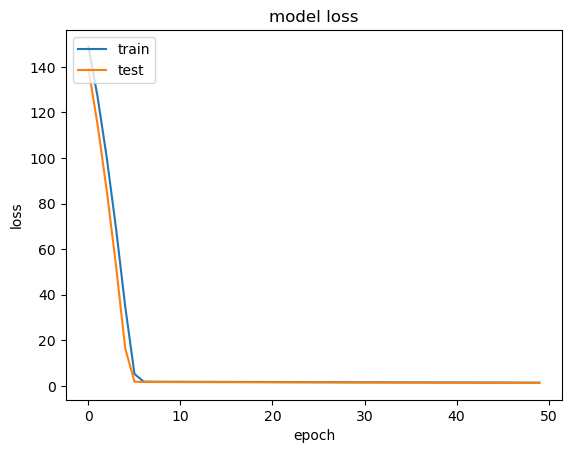

In [135]:
model = Sequential()

model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])

history=model.fit(x_train, y_train, epochs=50, verbose=0, validation_split=0.3)
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)
pre_score = sk.average_precision_score(y_test, y_pred_prob)
model.summary()
test_results = model.evaluate(x_test, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(e,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y_test,y_pred)
learningcurve(history)

247/247 [==============================] - 1s 4ms/step
Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_291 (Dense)           (None, 16)                896       
                                                                 
 dense_292 (Dense)           (None, 1)                 17        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.4179 - accuracy: 0.8766
For epoch = 100, the model test accuracy is 0.8765666484832764.
The model test average precision score is 0.17636646475711376.
[[6801  351]
 [ 624  123]] 

The accuracy is 0.8765666540068363
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


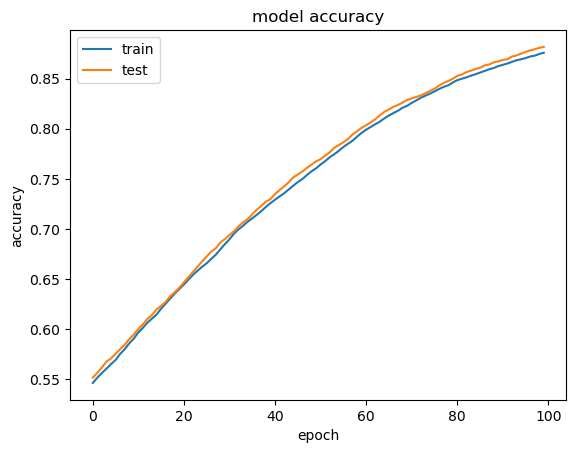

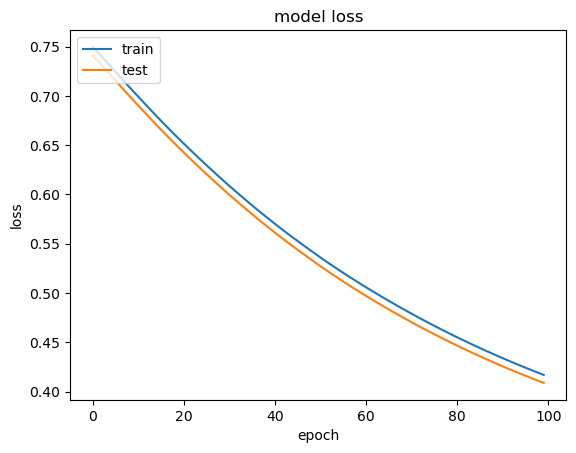

In [205]:
model = Sequential()
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])

history=model.fit(x_train_scaled, y_train,epochs=100,validation_split=0.3, verbose = 0)

y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y_test, y_pred_prob)

model.summary()
test_results = model.evaluate(x_test_scaled, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y_test,y_pred)
learningcurve(history)

Zaključak: Bolji rezultati su sa skaliranim dataset-om

<h2>3 Razlicite vrednosti za broj epoha</h2>

247/247 [==============================] - 1s 4ms/step
Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_291 (Dense)           (None, 16)                896       
                                                                 
 dense_292 (Dense)           (None, 1)                 17        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 4ms/step - loss: 0.4179 - accuracy: 0.8766
For epoch = 100, the model test accuracy is 0.8765666484832764.
The model test average precision score is 0.17636646475711376.
[[6801  351]
 [ 624  123]] 

The accuracy is 0.8765666540068363
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


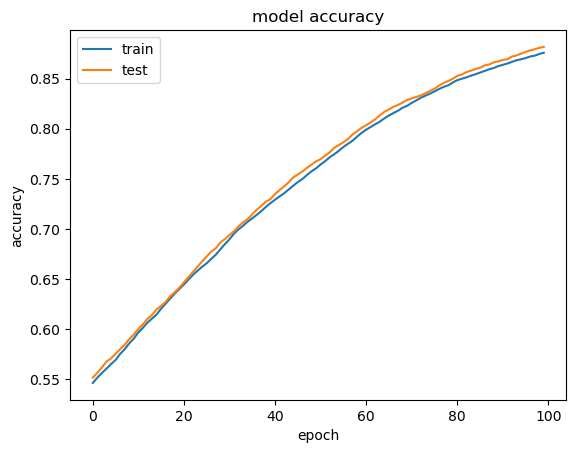

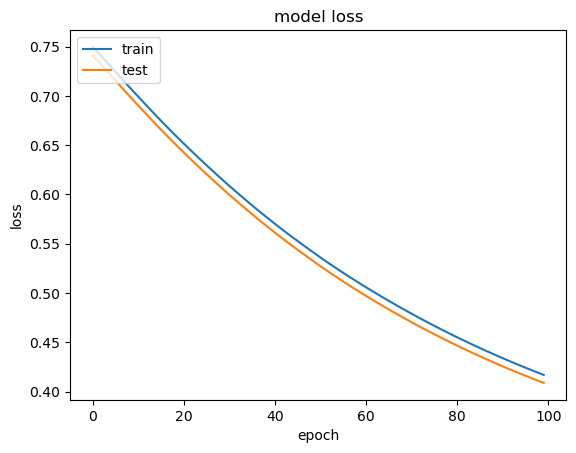

In [205]:
model = Sequential()
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])

history=model.fit(x_train_scaled, y_train,epochs=100,validation_split=0.3, verbose = 0)

y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y_test, y_pred_prob)

model.summary()
test_results = model.evaluate(x_test_scaled, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y_test,y_pred)
learningcurve(history)

247/247 [==============================] - 1s 4ms/step - loss: 0.3227 - accuracy: 0.9064
For epoch = 100, the model test accuracy is 0.9064438343048096.
The model test average precision score is 0.26890124941607524.
[[7061   91]
 [ 648   99]] 

The accuracy is 0.906443853652361
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


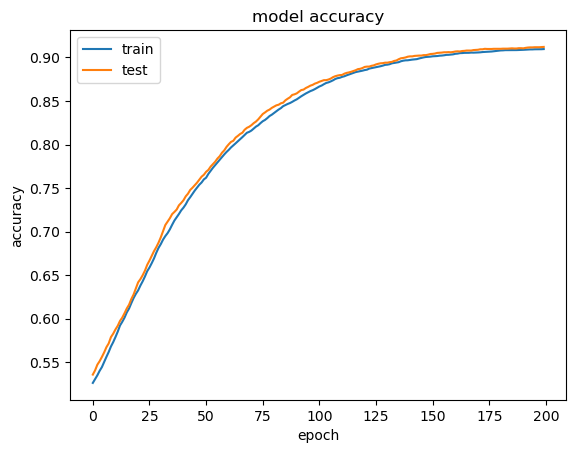

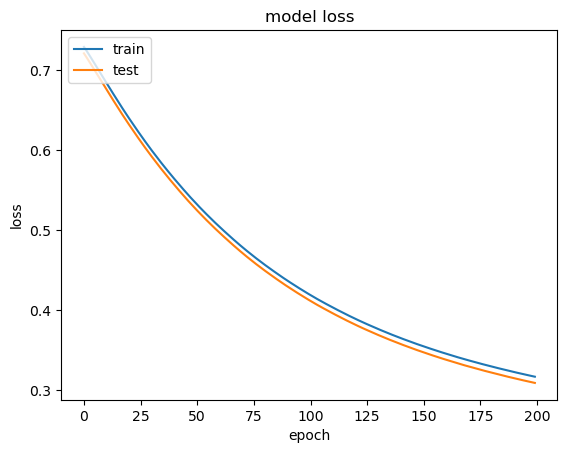

In [212]:
model = Sequential()
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=model.fit(x_train_scaled, y_train,epochs=200,validation_split=0.3, verbose = 0)
y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y_test, y_pred_prob)
test_results = model.evaluate(x_test_scaled, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y_test,y_pred)
learningcurve(history)

247/247 [==============================] - 1s 4ms/step - loss: 0.2721 - accuracy: 0.9121
For epoch = 100, the model test accuracy is 0.9121407866477966.
The model test average precision score is 0.42091034253663767.
[[7019  133]
 [ 561  186]] 

The accuracy is 0.912140777313584
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


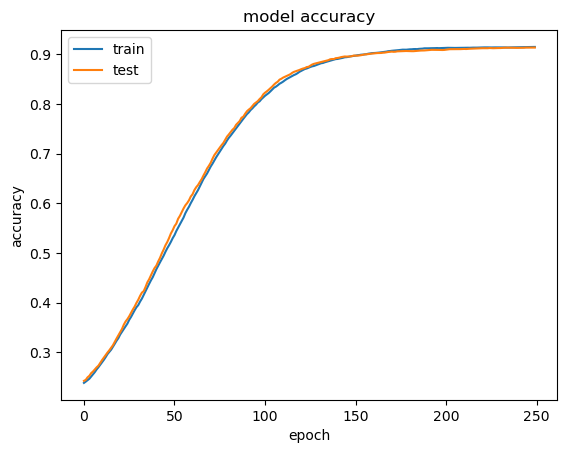

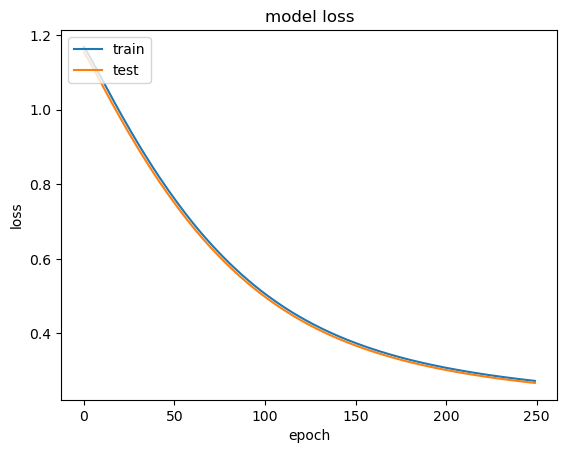

In [210]:
model = Sequential()
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=model.fit(x_train_scaled, y_train,epochs=250,validation_split=0.3, verbose = 0)
y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y_test, y_pred_prob)
test_results = model.evaluate(x_test_scaled, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y_test,y_pred)
learningcurve(history)

Zaključak: 200 epoha daje dobre rezultate, posle toga mreža overfitt-uje

<h2>4 Isprobavanje razlicitog broja slojeva</h2>

247/247 [==============================] - 1s 6ms/step - loss: 0.3277 - accuracy: 0.9054
For epoch = 100, the model test accuracy is 0.9054310917854309.
The model test average precision score is 0.13025975509914484.
[[7152    0]
 [ 747    0]] 

The accuracy is 0.9054310672236991
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


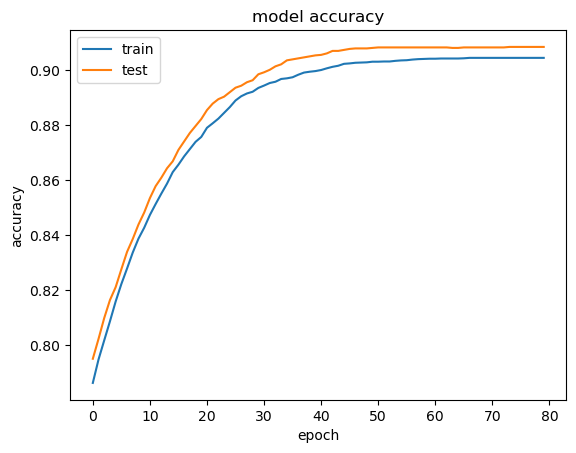

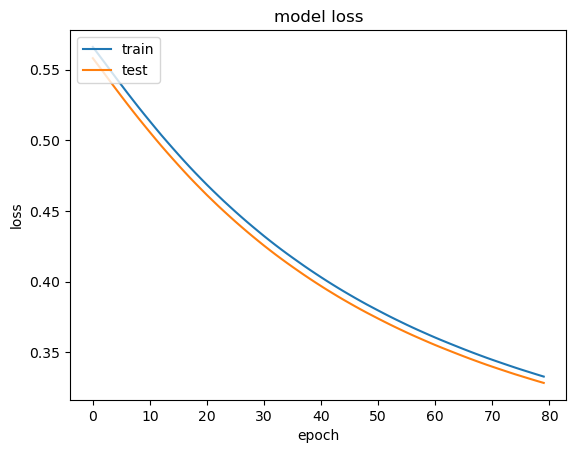

In [231]:
model = Sequential()

model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])

history=model.fit(x_train_scaled, y_train,epochs=80,validation_split=0.3, verbose = 0)

y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y_test, y_pred_prob)

test_results = model.evaluate(x_test_scaled, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y_test,y_pred)
learningcurve(history)

Zaključak: Sa dodavanjem novih slojeva, loše se prepoznaju negativni slučajevi, pa ostajemo sa modelom od 2 sloja.

<h2>5 Isprobavanje razlicitog broja cvorova</h2>

247/247 [==============================] - 1s 4ms/step
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_145 (Dense)           (None, 16)                896       
                                                                 
 dense_146 (Dense)           (None, 16)                272       
                                                                 
 dense_147 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 2s 6ms/step - loss: 0.3521 - accuracy: 0.9054
For epoch = 100, the model test accuracy is 0.9054310917854309.
The model test average precision score is 0.11246112500581498.
[[7152    0]
 [ 747    0]] 

The accuracy is

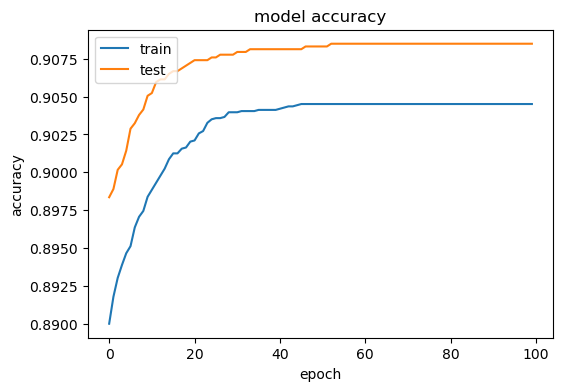

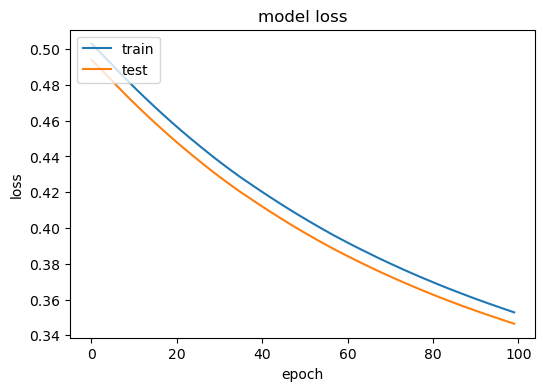

In [105]:
model = Sequential()
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=model.fit(x_train_scaled, y_train,epochs=100,validation_split=0.3, verbose = 0)
y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y_test, y_pred_prob)

model.summary()
test_results = model.evaluate(x_test_scaled, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y_test,y_pred)
learningcurve(history)

Zaključak: dodavanje velikog broja čvorova dovodi do lošeg prepoznavanja negativnih slučajeva.

<h2>6 Isprobavanje razlicitih aktivacionih funkcija</h2>

<h3>Model - tanh funkcija</h3>

247/247 [==============================] - 1s 4ms/step - loss: 0.3468 - accuracy: 0.9038
For epoch = 100, the model test accuracy is 0.9037852883338928.
The model test average precision score is 0.3940701671575592.
[[6883  269]
 [ 491  256]] 

The accuracy is 0.9037852892771236
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


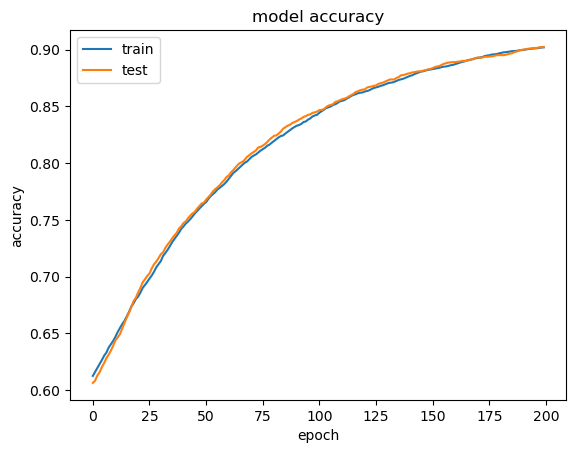

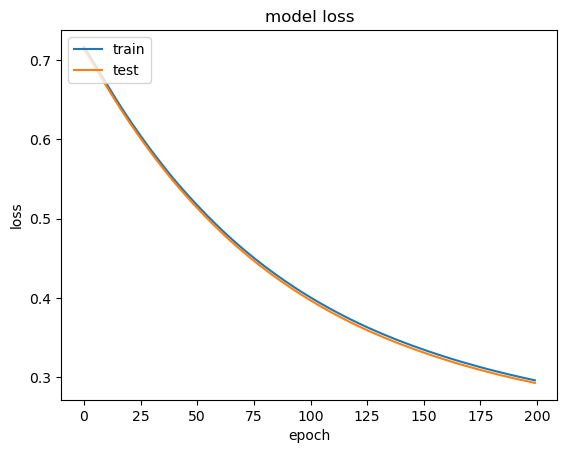

In [220]:
model = Sequential()
model.add(Dense(16,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])

history_tanh = model.fit(x_train_scaled, y_train,epochs=200,validation_split=0.3, verbose = 0)

y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y_test, y_pred_prob)
test_results = model.evaluate(x_test_scaled, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y_test,y_pred)
learningcurve(history)

<h3>Model - sigmoid funkcija</h3>

247/247 [==============================] - 1s 4ms/step - loss: 0.2805 - accuracy: 0.9054
For epoch = 100, the model test accuracy is 0.9054310917854309.
The model test average precision score is 0.30323103242291305.
[[7152    0]
 [ 747    0]] 

The accuracy is 0.9054310672236991
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


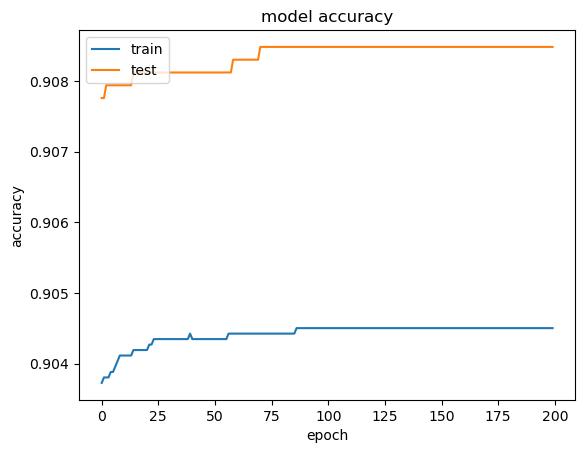

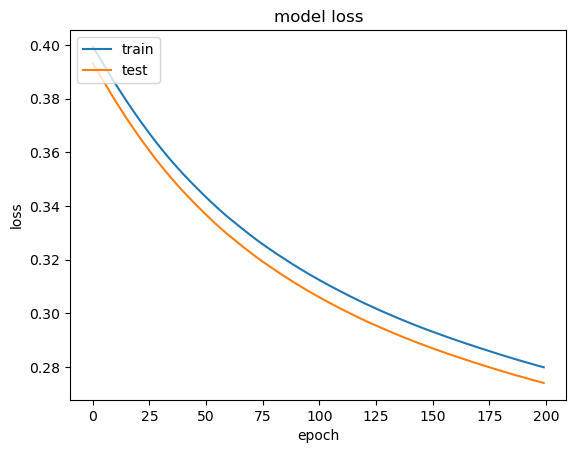

In [221]:
model = Sequential()
model.add(Dense(16,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])

history=model.fit(x_train_scaled, y_train,epochs=200,validation_split=0.3, verbose = 0)

y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y_test, y_pred_prob)
test_results = model.evaluate(x_test_scaled, y_test)

print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y_test,y_pred)
learningcurve(history)

<h3>Model - softmax funkcija</h3>

247/247 [==============================] - 1s 4ms/step - loss: 0.4535 - accuracy: 0.9053
For epoch = 100, the model test accuracy is 0.905304491519928.
The model test average precision score is 0.2906547287835207.
[[7151    1]
 [ 747    0]] 

The accuracy is 0.9053044689201165
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


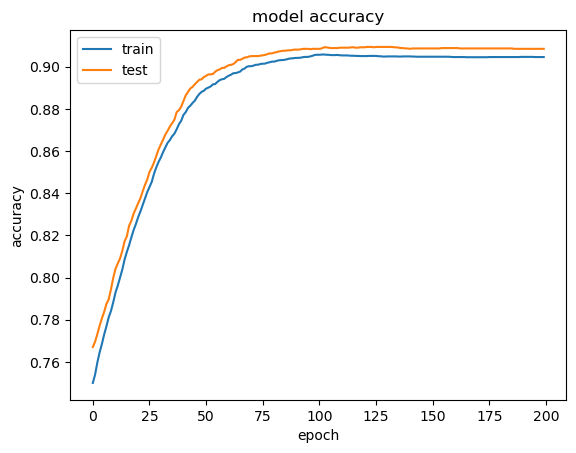

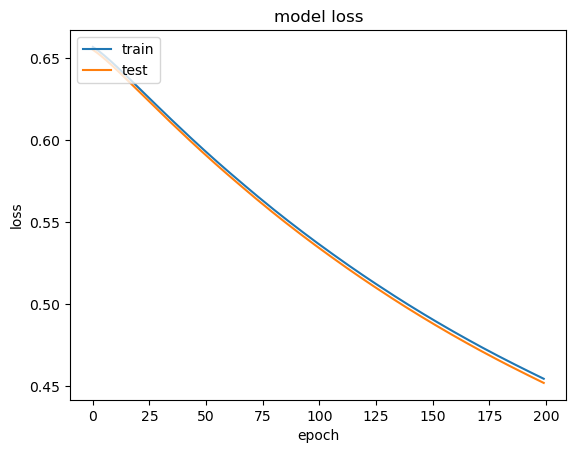

In [222]:
model = Sequential()
model.add(Dense(16,activation="softmax"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])

history=model.fit(x_train_scaled, y_train,epochs=200,validation_split=0.3, verbose = 0)

y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score= sk.average_precision_score(y_test, y_pred_prob)
test_results = model.evaluate(x_test_scaled, y_test)

print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y_test,y_pred)
learningcurve(history)

<h3>Model - relu funkcija</h3>

247/247 [==============================] - 1s 4ms/step - loss: 0.3227 - accuracy: 0.9064
For epoch = 100, the model test accuracy is 0.9064438343048096.
The model test average precision score is 0.26890124941607524.
[[7061   91]
 [ 648   99]] 

The accuracy is 0.906443853652361
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


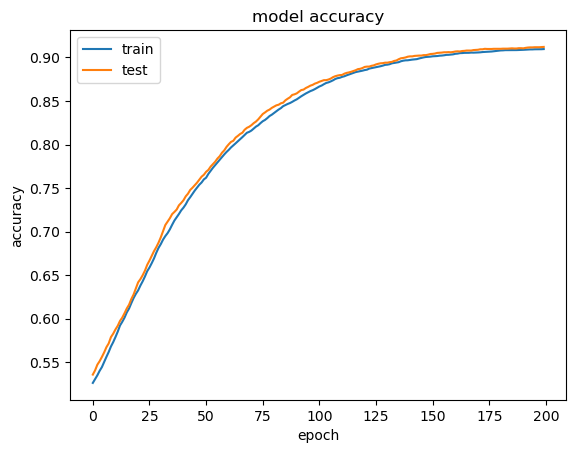

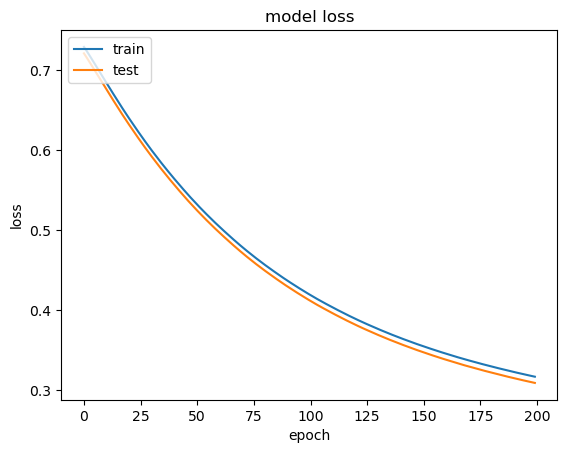

In [212]:
model = Sequential()
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])

history=model.fit(x_train_scaled, y_train,epochs=200,validation_split=0.3, verbose = 0)

y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y_test, y_pred_prob)
test_results = model.evaluate(x_test_scaled, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y_test,y_pred)
learningcurve(history)

Zaključak: Najbolje je koristiti 'relu' funkciju aktivacije.

<h2>7 Podesavanje learning rate-a</h2>

<h3>ReduceLROnPlateau - PREDLOG</h3> 

247/247 [==============================] - 2s 5ms/step
Model: "sequential_129"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_346 (Dense)           (None, 16)                896       
                                                                 
 dense_347 (Dense)           (None, 1)                 17        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 1s 5ms/step - loss: 0.3109 - accuracy: 0.8910
For epoch = 100, the model test accuracy is 0.8909988403320312.
The model test average precision score is 0.23164648565204965.
[[6726  426]
 [ 435  312]] 

The accuracy is 0.8909988606152678
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


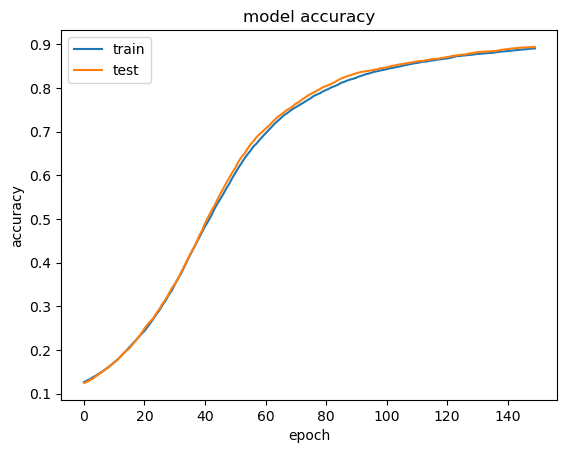

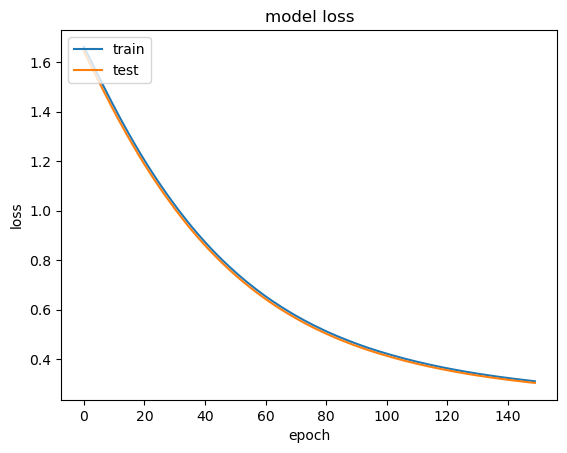

In [236]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)

model = Sequential()
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer = 'adadelta', loss='binary_crossentropy', metrics=['accuracy'])

history=model.fit(x_train_scaled, 
                  y_train, 
                  batch_size = 10, 
                  epochs=150,
                  validation_split=0.3, 
                  verbose=0, 
                  callbacks=[reduce_lr])

y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y_test, y_pred)
model.summary()
test_results = model.evaluate(x_test_scaled, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y_test,y_pred)
learningcurve(history)

<h3>LearningRateScheduler i SGD optimizer</h3>

247/247 [==============================] - 2s 5ms/step
Model: "sequential_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_344 (Dense)           (None, 16)                896       
                                                                 
 dense_345 (Dense)           (None, 1)                 17        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________
247/247 [==============================] - 3s 10ms/step - loss: 0.3949 - accuracy: 0.8682
For epoch = 100, the model test accuracy is 0.8682111501693726.
The model test average precision score is 0.1364783467356795.
[[6682  470]
 [ 571  176]] 

The accuracy is 0.868211165970376
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


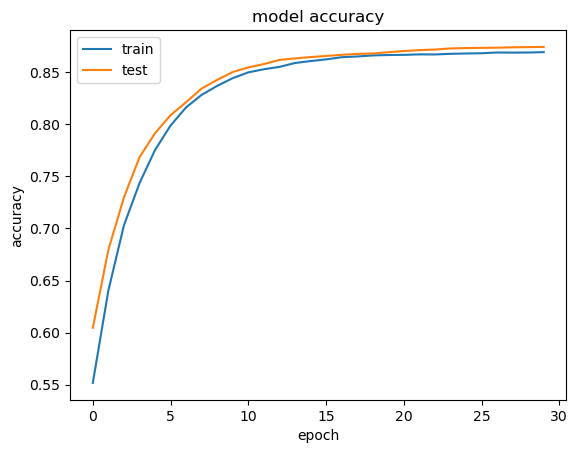

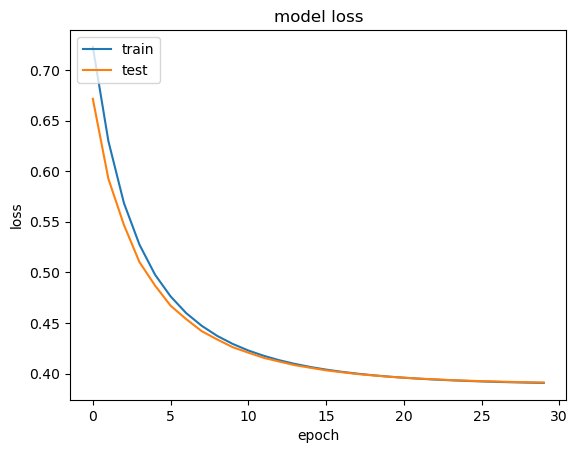

In [235]:
from keras.callbacks import LearningRateScheduler

epoch = 100
lr_sched = LearningRateScheduler(lambda epoch: 1e-4 * (0.75 ** np.floor(epoch / 2)))

model = Sequential()
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer = 'sgd', loss='binary_crossentropy', metrics=['accuracy'])

history=model.fit(x_train_scaled, 
                  y_train, 
                  batch_size = 10, 
                  epochs=30,
                  validation_split=0.3, 
                  verbose=0, 
                  callbacks=[lr_sched])

y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y_test, y_pred)
model.summary()
test_results = model.evaluate(x_test_scaled, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y_test,y_pred)
learningcurve(history)

<h2>8 Custom loss funkcija</h2>

In [47]:
from keras import backend as K

def custom_loss(y_true, y_pred):
    y_true = K.cast(y_true, dtype='float32')
    loss = K.binary_crossentropy(y_true, y_pred)
    
    penalty = 0.1
    false_positive_penalty = K.mean(K.maximum(y_pred - y_true, 0))
    false_negative_penalty = K.mean(K.maximum(y_true - y_pred, 0))
    loss = loss + penalty * (false_positive_penalty + false_negative_penalty)
    
    return loss

247/247 [==============================] - 1s 4ms/step - loss: 0.3070 - accuracy: 0.9038
For epoch = 100, the model test accuracy is 0.9037852883338928.
The model test average precision score is 0.13127111817893156.
[[7064   88]
 [ 672   75]] 

The accuracy is 0.9037852892771236
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


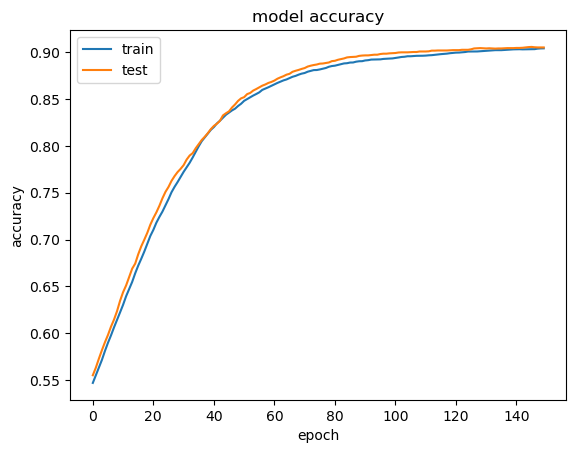

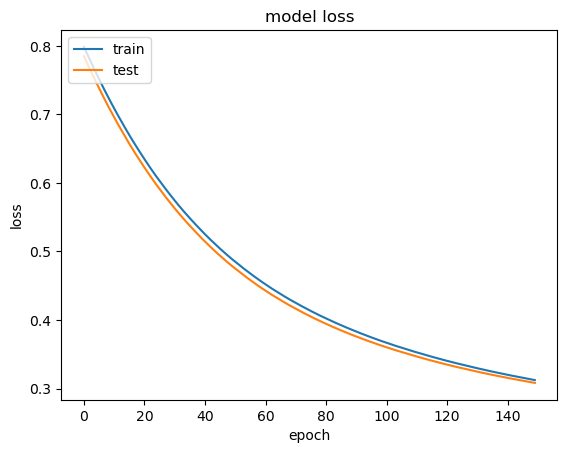

In [239]:
model = Sequential()
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer = 'adadelta', loss = custom_loss, metrics=['accuracy'])

history=model.fit(x_train_scaled, y_train, batch_size = 10, epochs=150,validation_split=0.3, verbose=0)

y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y_test, y_pred)
test_results = model.evaluate(x_test_scaled, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y_test,y_pred)
learningcurve(history)

Zaključak: sa custom loss funkcijom dobijamo dobru preciznost ali matrica konfuzije je gora.

<h2>9 Izazivanje overfitting-a</h2>

247/247 [==============================] - 2s 6ms/step - loss: 0.2022 - accuracy: 0.9183
For epoch = 100, the model test accuracy is 0.9183440804481506.
The model test average precision score is 0.26082880969245453.
[[7029  123]
 [ 522  225]] 

The accuracy is 0.9183440941891379
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


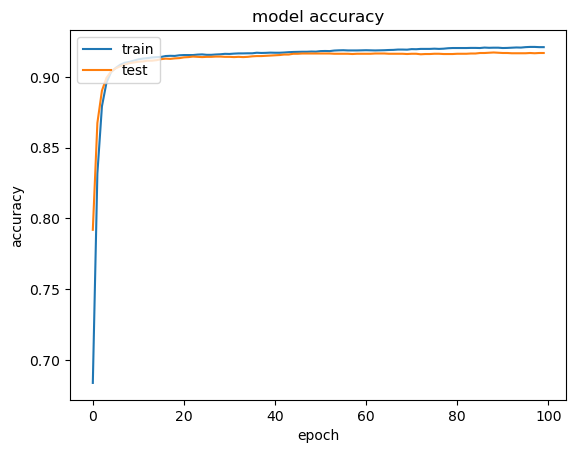

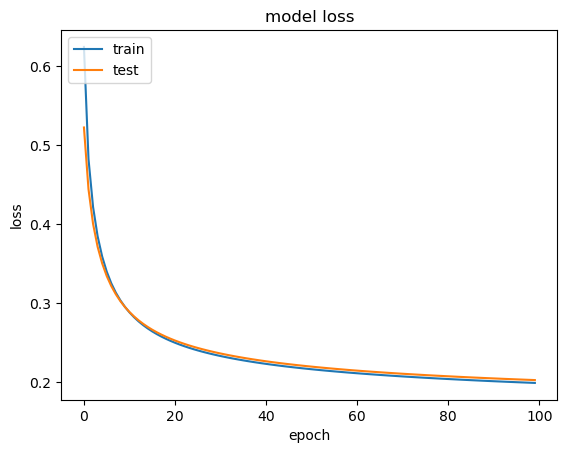

In [258]:
model = Sequential()
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer = 'adagrad', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(x_train_scaled, y_train, batch_size = 10, epochs=100,validation_split=0.3, verbose=0)
y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y_test, y_pred)
test_results = model.evaluate(x_test_scaled, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y_test,y_pred)
learningcurve(history)

<h2>10 Rešavanje overfitting-a</h2>

<h3>Early stopping</h3>

247/247 [==============================] - 2s 7ms/step - loss: 0.3685 - accuracy: 0.9028
For epoch = 100, the model test accuracy is 0.9027724862098694.
The model test average precision score is 0.2462665271996995.
[[6839  313]
 [ 455  292]] 

The accuracy is 0.9027725028484618
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


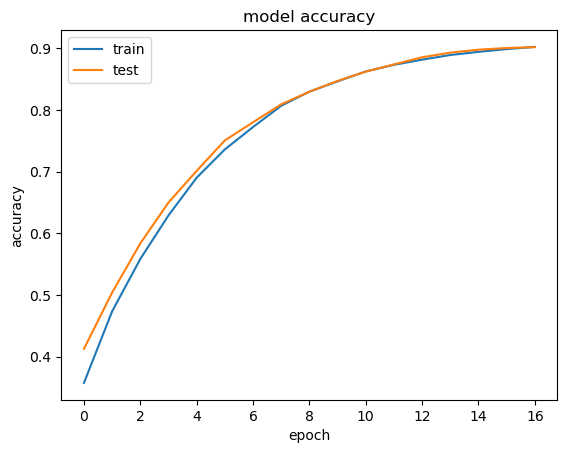

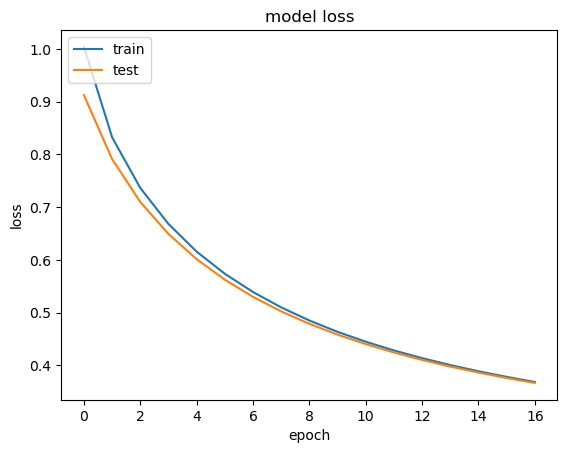

In [278]:
model = Sequential()
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer = 'adagrad', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=1, 
    verbose=0, 
    mode='min',
    min_delta=0.01
)
mc = keras.callbacks.ModelCheckpoint(
    'best_m.h5',
    monitor='val_loss',
    mode='min',
    verbose=0,
    save_best_only=True
)
history=model.fit(x_train_scaled, 
                  y_train, 
                  epochs=100,
                  validation_split=0.3, 
                  verbose=0, 
                  callbacks=[early_stopping, mc]
                 )

y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  
pre_score = sk.average_precision_score(y_test, y_pred)
test_results = model.evaluate(x_test_scaled, y_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y_test,y_pred)
learningcurve(history)

<h2>11 SMOTE oversampling</h2>

In [36]:
oversample = SMOTE()
x_train_smote, y_train_smote = oversample.fit_resample(x_train_scaled, y_train)
counter = Counter(y_train_smote)
print(counter)

Counter({0: 16701, 1: 16701})


In [50]:
models = []

247/247 [==============================] - 7s 4ms/step - loss: 0.3523 - accuracy: 0.8518
For epoch = 100, the model test accuracy is 0.8517534136772156.
The model test average precision score is 0.34934035973960786.
F1 score: 0.5347636074692094
[[6055 1077]
 [  94  673]] 

The accuracy is 0.8517533865046208
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


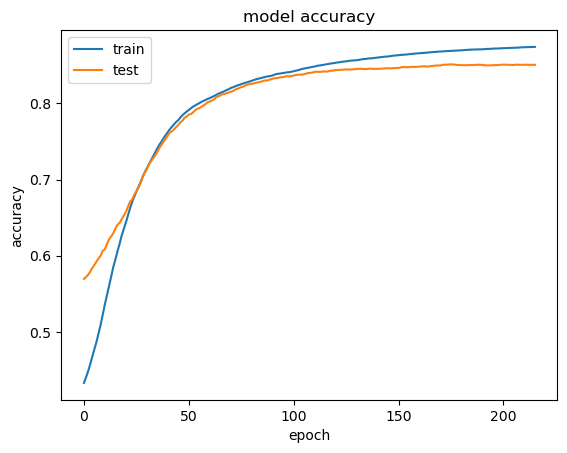

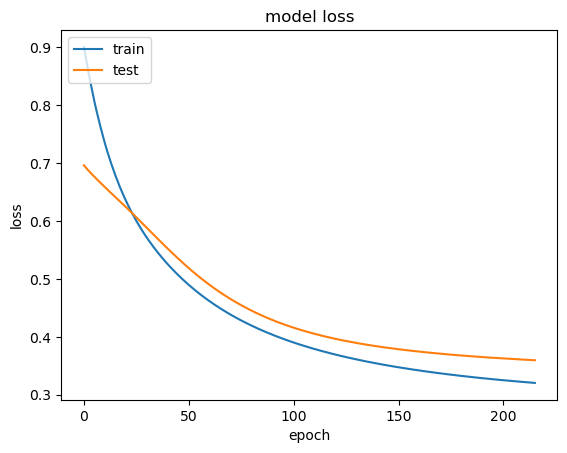

In [61]:
callbacks=[]
callbacks.append(ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001))
callbacks.append(keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    verbose=0, 
    mode='min',
    min_delta = 0.001
))
results = neural_network(nodes=[16],
               activation_functions=["relu"],
               optimizer="adadelta",
               callbacks=callbacks,
               x_train=x_train_smote,
               y_train=y_train_smote,
               epochs=500
              )

models.append(results)

247/247 [==============================] - 1s 5ms/step - loss: 0.3045 - accuracy: 0.8720
For epoch = 100, the model test accuracy is 0.8720090985298157.
The model test average precision score is 0.38329659814995565.
F1 score: 0.5710649130250318
[[6215  917]
 [  94  673]] 

The accuracy is 0.8720091150778579
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


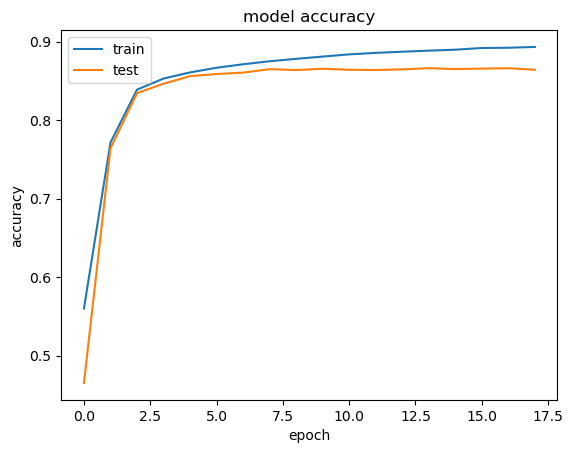

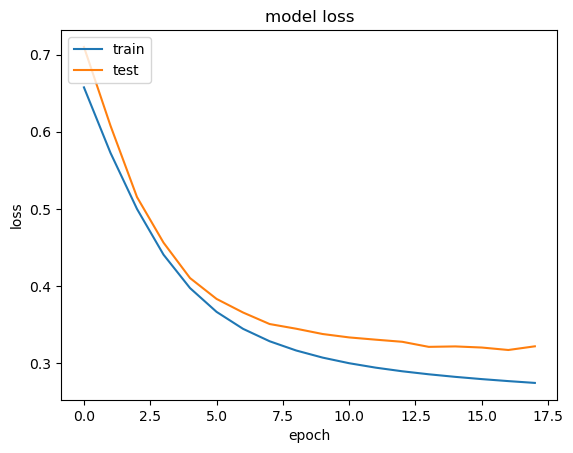

 0.5710649130250318,
 0.8720090985298157]

In [47]:
callbacks=[]
callbacks.append(ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001))
callbacks.append(keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    verbose=0, 
    mode='min',
    min_delta = 0.1
))
results = neural_network(nodes=[512, 256, 256, 128],
               activation_functions=["relu", "relu", "relu", "relu"],
               optimizer="adadelta",
               callbacks=callbacks,
               x_train=x_train_smote,
               y_train=y_train_smote,
               epochs=1000
              )
models.append(results)

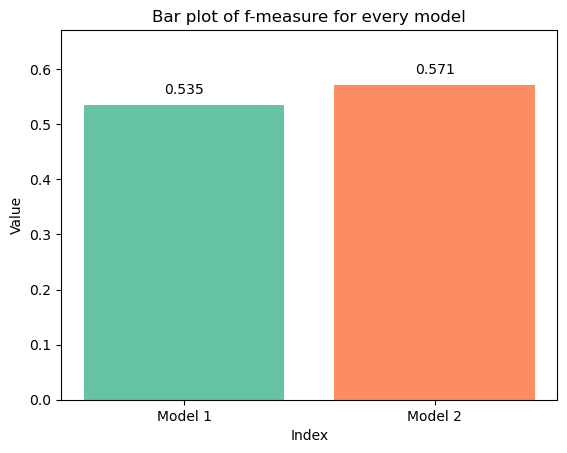

In [68]:
bar_plot(models)

<h3>SMOTE oversampling 70/100</h3>

In [75]:
# Set sampling strategy for SMOTE
sampling_strategy = 0.7/1.0

# Apply SMOTE with specified sampling strategy
oversample_strategy = SMOTE(sampling_strategy=sampling_strategy)
x_train_smote_s, y_train_smote_s = oversample_strategy.fit_resample(x_train_scaled, y_train)

# Check class distribution after oversampling
counter = Counter(y_train_smote_s)
print(counter)

Counter({0: 11736, 1: 8215})


247/247 [==============================] - 7s 5ms/step - loss: 0.2609 - accuracy: 0.8867
For epoch = 100, the model test accuracy is 0.8866944909095764.
The model test average precision score is 0.3693850815737107.
F1 score: 0.5686746987951807
[[6414  718]
 [ 177  590]] 

The accuracy is 0.8866945182934549
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


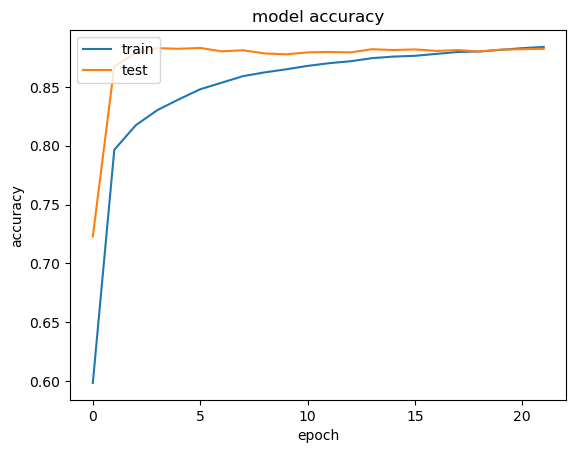

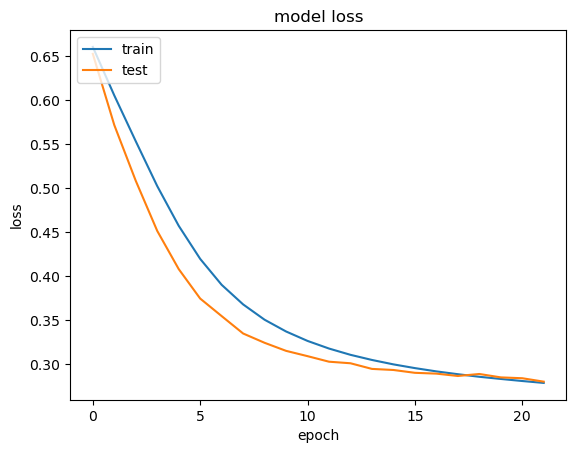

In [77]:
callbacks=[]
callbacks.append(ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001))
callbacks.append(keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    verbose=0, 
    mode='min',
    min_delta = 0.1
))
results = neural_network(nodes=[512, 256, 256, 128],
               activation_functions=["relu", "relu", "relu", "relu"],
               optimizer="adadelta",
               callbacks=callbacks,
               x_train=x_train_smote_s,
               y_train=y_train_smote_s,
               epochs=1000
              )
models.append(results)

<h2>12 NearMiss Undersampling</h2>

In [69]:
undersample = NearMiss(version=1)
x_train_undersampled, y_train_undersampled = undersample.fit_resample(x_train_scaled, y_train)

247/247 [==============================] - 8s 4ms/step - loss: 0.8981 - accuracy: 0.3152
For epoch = 100, the model test accuracy is 0.31522977352142334.
The model test average precision score is 0.08212814736890076.
F1 score: 0.109042991269972
[[2159 4973]
 [ 436  331]] 

The accuracy is 0.31522977592100265
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


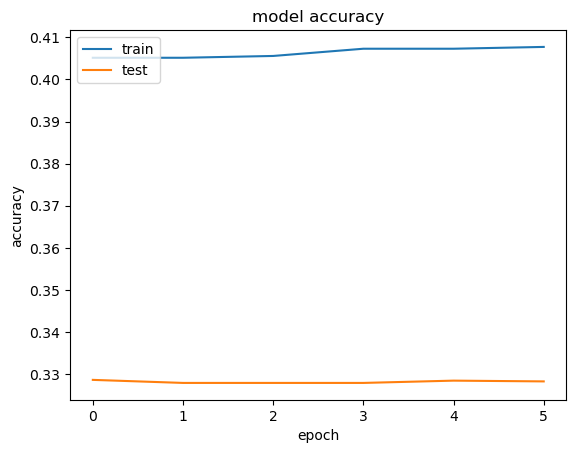

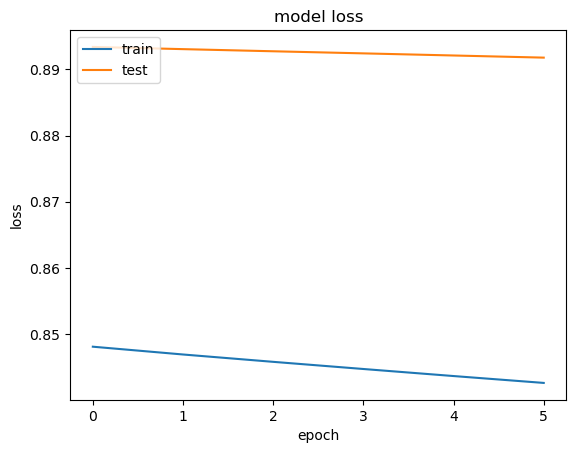

In [71]:
callbacks=[]
callbacks.append(ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001))
callbacks.append(keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    verbose=0, 
    mode='min',
    min_delta = 0.01
))
results = neural_network(nodes=[16],
               activation_functions=["relu"],
               optimizer="adadelta",
               callbacks=callbacks,
               x_train=x_train_undersampled,
               y_train=y_train_undersampled,
               epochs=500
              )

models.append(results)

247/247 [==============================] - 9s 6ms/step - loss: 0.8177 - accuracy: 0.1281
For epoch = 100, the model test accuracy is 0.12811748683452606.
The model test average precision score is 0.09934787964439203.
F1 score: 0.18060678167757285
[[ 253 6879]
 [   8  759]] 

The accuracy is 0.12811748322572478
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


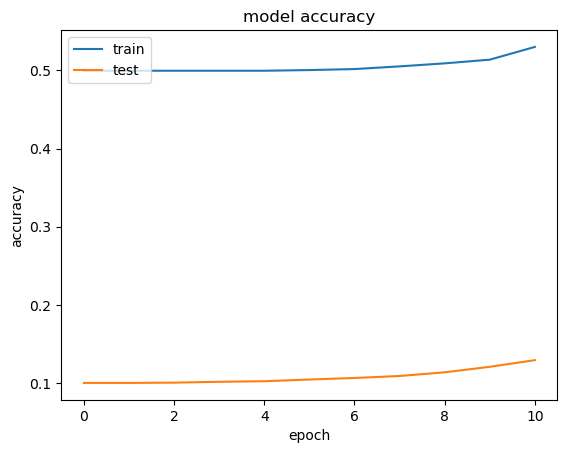

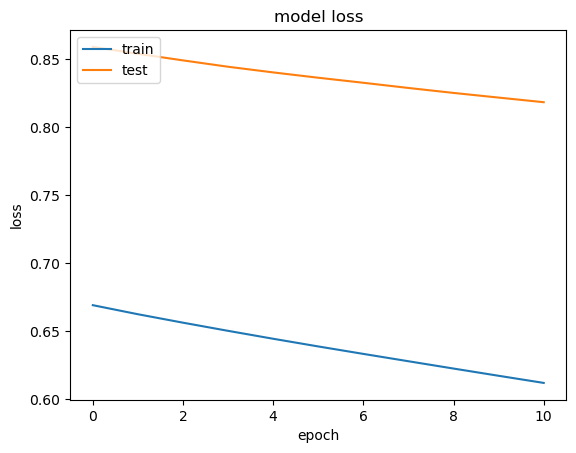

In [70]:
callbacks=[]
callbacks.append(ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001))
callbacks.append(keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    verbose=0, 
    mode='min',
    min_delta = 0.1
))
results = neural_network(nodes=[512, 256, 256, 128],
               activation_functions=["relu", "relu", "relu", "relu"],
               optimizer="adadelta",
               callbacks=callbacks,
               x_train=x_train_undersampled,
               y_train=y_train_undersampled,
               epochs=1000
              )
models.append(results)